# Plotting expression data
## of given gene ID's
01. This script plot the expression data of defined gene modules from WGCNA
The modules are named by colors (e.g. red, blue, ect.). This script allow the input of a colorname and plots the expressin values of all the genes in that module.
02. This script plot the expression data of any given list of gene ID's. 
This script allows the input of gene list (robin IDs or ncbi ID) and will plot the expression value of the given genes.

### Housekeeping
You start with specifing the path to your machine, and the species you want to investigate. These 
Next you import all the modules used for this script

In [1]:
### Housekeeping
# 
# load modules
import sqlite3 # to connect to database
import pandas as pd # data anaylis handeling
import numpy as np  # following three are for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import colorsys
import matplotlib
#
# specify path to folder were your data files are, or your database is
path = '/Users/roos_brouns/Dropbox/Ant-fungus/02_scripts/Git_Das_folder2/Das_et_al_2022a'
#
# specify species
species = 'ophio_cflo'

# Add defenition for color palette making for plotting. 
# source: source: https://stackoverflow.com/questions/37765197/darken-or-lighten-a-color-in-matplotlib
def scale_lightness(rgb, scale_l):
    # convert rgb to hls
    h, l, s = colorsys.rgb_to_hls(*rgb)
    # manipulate h, l, s values and return as rgb
    return colorsys.hls_to_rgb(h, min(1, l * scale_l), s = s)

### Load in the data
The next step is to load in the data. This can be done with connection to a database base in this example or a excel/cvs with the data kan be read in. The database used in this tutorial is can be made with another script <db_making> [REF].

In [2]:
### Load in data
#
# Connect to the database
conn = sqlite3.connect(f'{path}/data/databases/new_TC6_fungal_data.db')
#
# read data from DB into dataframe  
exp_val = pd.read_sql_query(f"SELECT * from {species}_fpkm", conn)

### Clean data
#
# drop 'start' and 'end' columns
exp_val.drop(['start','end'], axis=1, inplace=True)

### Part 01. Plotting expression value of modules
This next part of code plots the expression values of all the genes in a defined module. These module have been defined with WCGNA and <Billu's tutorial> can be used to do this step [REF]. 
* This code will ask for an input of color names of the defined module

Enter elements of a list separated by space green tan


giving input colors ['green', 'tan']


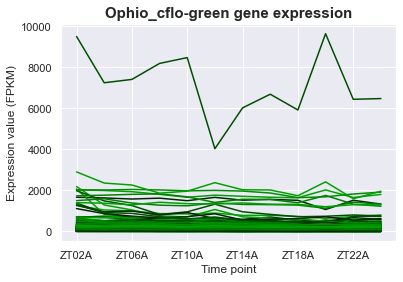

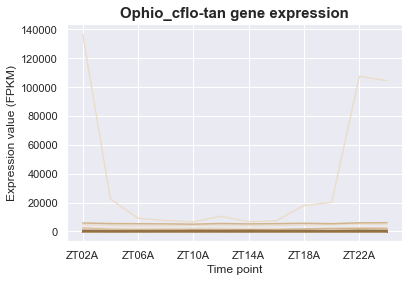

In [8]:
### Part 01. Plot expressioin value of modules
#
# A. Get the data you want to plot
#
# Load in the data with the gene ID's and their assigned module
all_modules = pd.read_csv(f'{path}/results/networks/{species}_gene_IDs_and_module_identity.csv')
# Clean the data by dropping exsessive columns
all_modules.drop(['start', 'end'], axis=1, inplace=True)
#
#
# Input the colors of the modules you want to plot
# source : https://pynative.com/python-accept-list-input-from-user/
input_string = input('Enter elements of a list separated by space ')
print("\n")
module_list = input_string.split()
# print list
print('giving input colors', module_list)

try:
    
    for color in module_list:

        # Define the module you want to plot
        module_name = color
        # select all the data of that module
        module_data = all_modules.loc[all_modules['module_identity'] == module_name]
        # select the gene ID's in of the module
        module_IDs = pd.DataFrame(module_data['gene_ID_robin'])
        # get the expression values of the selected gene ID's in the module
        exp_val_module = module_IDs.merge(exp_val, on='gene_ID_robin', how='left')
        #

        # B. Plot the data
        # 
        # Transform the data so we can plot
        t_exp_val_module = exp_val_module.T
        t_exp_val_module.drop(['gene_ID_robin','gene_ID_ncbi'], axis=0, inplace=True)
        #
        # Make the color palette for plotting
        color = matplotlib.colors.ColorConverter.to_rgb(module_name)
        rgbs = [scale_lightness(color, scale) for scale in [0.3, .6, 1, 1.1, 1.25]]
        # Show the palette color
        # sns.palplot(rgbs)
        #
        # set background and the color palette
        sns.set_theme()
        sns.set_palette(rgbs)
        #
        # Plot the gene expression values against the time, without legend and with titles
        ax = t_exp_val_module.plot(legend=False)
        ax.set_title(species[0].upper()+f'{species[1:len(species)]}-{module_name} gene expression', fontsize=15, fontweight='bold')
        ax.set_xlabel('Time point')
        ax.set_ylabel('Expression value (FPKM)')
        #
        ### Done.

except:
    print('Wrong input was given: No color module was defined or the given color does not exist as module.')

In [ ]:
# ### X-axis try outs
# label = t_exp_val_module.index
# ndx = t_exp_val_module.index
# time_points = 2+np.arange(len(t_exp_val_module))*2

# exp_val_module
# sns.set_palette('Greens')
# t_exp_val_module.plot(legend=False)
# #plt.xticks(time_points)
# #plt.xticks(time_points, ndx)